# Zipf law , TF/IDF, Jaccard Coeffecient, Cosine Similarity 

In [75]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import collections as cs

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table.

### You are provided with a text file (Data.txt).
#### • Calculate the rank of the words in the corpus 
#### • Calculate the frequency of the words in the corpus 
#### • Plot them to show if they hold Zipf’s law. Validate your graph with a suitable explanation.

In [76]:
def removePunctuations(doc):
    temp = list()
    #removing punctutation marks
    translator=str.maketrans('','',string.punctuation)
    for i in doc:
        temp.append(i.translate(translator))
        
    return temp

In [77]:
#removing new line from elements of list 
def removeNewLine(doc):
    temp=list()
    for i in doc:
         temp.append(i.replace("\n",""))
            
    return temp

In [78]:
def removeWhiteSpace(doc):
    temp = list()
    for i in doc:
        temp.append(i.strip())
    
    return temp

In [79]:
data_handle = open('data.txt','r',encoding='utf-8')
print("Reading Data...!!!!!!!!")
data_raw = data_handle.readlines()
data=[]
for i in range(0,len(data_raw)):
    temp = data_raw[i]
    for j in temp:
        data.append(j)

Reading Data...!!!!!!!!


In [80]:
print("Preprocessing the data")
data = removePunctuations(data)
data = removeNewLine(data)
data = removeWhiteSpace(data)

Preprocessing the data


In [81]:
#counting of tags
print("Starting counting frequency of words..!!!!!")
count_of_words = cs.Counter(data)

print("Finished counting frequency of words..!!!!!")


Starting counting frequency of words..!!!!!
Finished counting frequency of words..!!!!!


In [82]:
del count_of_words['']
words = list(count_of_words.keys())
value = list(count_of_words.values())

In [83]:
df = pd.DataFrame(columns={'Words','Frequency'})
df['Words'] = words
df['Frequency'] = value
df = df.sort_values(by=['Frequency'],ascending=False)
df['Rank'] = [i for i in range(1,len(df)+1)]
df.head()


,Words,Frequency,Rank
1,e,21754,1
12,t,14592,2
6,a,13277,3
3,o,12749,4
18,h,11654,5


In [84]:
value.sort(reverse=True)

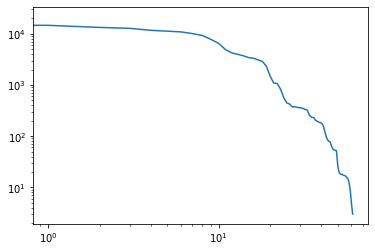

In [85]:
plt.loglog(value)
plt.show()

### Similarity Measurement 

#### You are provided with three documents(𝐷𝑖)below.
#### 𝐷1 = this is a text about web science
#### 𝐷2 = web science is covering the analysis of text corpa
#### 𝐷3 = scientific methods are used to analyze web pages

#### Write a short python script that calculates the Jaccard similarity between all the documents.


### Function to calculate Jacard Coefficient

In [86]:
def jacard_coefficent(A,B):
    j_c = len(A.intersection(B))/len(A.union(B))
    
    return round(j_c,2)

### Creating the string for each document

In [87]:
#creating the string for each document store the returned result
d1 = "this is a text about web science"
d2 = "web science is covering the analysis of text corpa"
d3 = "scientific methods are used to analyze web pages"

### Tokenization step
#### splitting the string based on "space character" and storing them into separate list.

In [88]:
#storing the result into separate list
d1_token=d1.split(' ')
d2_token=d2.split(' ')
d3_token=d3.split(' ')


### Creating the set of each document to calculate Jacard Coefficient

In [89]:
#creating set of each document
d1_set = set(d1_token)
d2_set = set(d2_token)
d3_set = set(d3_token)

## Calculating Jacard coefficent

#### Formula of Jacard coefficient:-

#### JACARD(A,B) = |A∩B| / |A∪B|

In [90]:
print("Jacard Coefficient between D1 and D2:- "  + str(jacard_coefficent(d1_set,d2_set)))

print("Jacard Coefficient between D1 and D3:- "  + str(jacard_coefficent(d1_set,d3_set)))

print("Jacard Coefficient between D2 and D3:- "  + str(jacard_coefficent(d2_set,d3_set)))


Jacard Coefficient between D1 and D2:- 0.33
Jacard Coefficient between D1 and D3:- 0.07
Jacard Coefficient between D2 and D3:- 0.06


# Similarity Measurement 

### Write a simple python script that computes the Cosine Similarity of the three documents defined in the previous question.

#### Generates a term frequency vector for each of the document.

In [91]:
number_of_terms = list(set(d1_token + d2_token + d3_token))

doc_list=('D1','D2','D3')

number_of_terms.sort()
bool_value = []

data_frame = pd.DataFrame(columns=number_of_terms)

for i in range(len(number_of_terms)):
    
    if number_of_terms[i] in d1_token:
        bool_value.append(1)
    else:
        bool_value.append(0)
    
    if number_of_terms[i] in d2_token:
        bool_value.append(1)
    else:
        bool_value.append(0)
        
    if number_of_terms[i] in d3_token:
        bool_value.append(1)
    else:
        bool_value.append(0)

        
    data_frame[number_of_terms[i]] = bool_value
    bool_value[:] = []
    
term_frequency = pd.DataFrame(data_frame.T.sort_index())

#### Term Frequency Table

In [92]:
term_frequency

,0,1,2
a,1,0,0
about,1,0,0
analysis,0,1,0
analyze,0,0,1
are,0,0,1
corpa,0,1,0
covering,0,1,0
is,1,1,0
methods,0,0,1
of,0,1,0


### Term frequency vector for each document

In [93]:
## Term frequency vector for Doc1
d1_vector = term_frequency[0].to_list()

## Term frequency vector for Doc2
d2_vector = term_frequency[1].to_list()

## Term frequency vector for Doc3
d3_vector = term_frequency[2].to_list()

#printing Term frequency vector for each document
print("Term Frequency vector of D1:- " + str(d1_vector))
print("Term Frequency vector of D2:- " + str(d2_vector))
print("Term Frequency vector of D3:- " + str(d3_vector))

Term Frequency vector of D1:- [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]
Term Frequency vector of D2:- [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
Term Frequency vector of D3:- [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1]


#### Creating document frequency table

In [94]:
def countOfTerm(term,corpus):
    total_count=0
    count = 0
    for j in range(0,len(corpus)):
        count = corpus_list[j].count(term)
        total_count = total_count + count
    
    return total_count

In [95]:
#Document frequency means the number of terms present in each document
term_count = 0

#creating a dictionary to hold the count of each term for all the document_corpus
corpus_index= {}

#creating a list for to make a list of each term present in document_corpus
corpus_list = list()

corpus_list.append(d1_token)
corpus_list.append(d2_token)
corpus_list.append(d3_token)

#Using for loop to count the number of terms present in the document_corpus
for item in number_of_terms:
    term_count = countOfTerm(item,corpus_list)
    corpus_index[item] = term_count

#### Function to calculate the count of individual term present in document_corpus

### Document Frequency Table

In [96]:
#Converting the pandas dataframe for document_frequency_table

#converting the dictionary corpus_index into dataframe, which holds the count of each term present in document_corpus
document_frequency = pd.DataFrame(corpus_index.items(),columns=['Term','df(t)'])


#Displaying Document_Frequency table
document_frequency

,Term,df(t)
0,a,1
1,about,1
2,analysis,1
3,analyze,1
4,are,1
5,corpa,1
6,covering,1
7,is,2
8,methods,1
9,of,1


### Calculating inverse document frequency ( idf(t) )

In [97]:
#Calculating the idf(t) values

#Adding a new column i.e. idf(t)
document_frequency['idf(t)'] = np.log10(3 / document_frequency['df(t)'])

document_frequency

,Term,df(t),idf(t)
0,a,1,0.477121
1,about,1,0.477121
2,analysis,1,0.477121
3,analyze,1,0.477121
4,are,1,0.477121
5,corpa,1,0.477121
6,covering,1,0.477121
7,is,2,0.176091
8,methods,1,0.477121
9,of,1,0.477121


## Calculating TF(t) x IDF(t) table

### This is calculated by multiplying the term frequency table and document frequency table

In [98]:


#Intializing with term_frequency table
tf_idf = term_frequency.copy()


# multiplying each column of tf_idf with document_frequency['idf(t)'] column in order to calculate the weight
tf_idf[0] = [x*y for x,y in zip(tf_idf[0],document_frequency['idf(t)'])]
tf_idf[1] = [x*y for x,y in zip(tf_idf[1],document_frequency['idf(t)'])]
tf_idf[2] = [x*y for x,y in zip(tf_idf[2],document_frequency['idf(t)'])]
tf_idf

,0,1,2
a,0.477121,0.000000,0.000000
about,0.477121,0.000000,0.000000
analysis,0.000000,0.477121,0.000000
analyze,0.000000,0.000000,0.477121
are,0.000000,0.000000,0.477121
corpa,0.000000,0.477121,0.000000
covering,0.000000,0.477121,0.000000
is,0.176091,0.176091,0.000000
methods,0.000000,0.000000,0.477121
of,0.000000,0.477121,0.000000


In [99]:
#Diplaying tf_idf table
tf_idf

,0,1,2
a,0.477121,0.000000,0.000000
about,0.477121,0.000000,0.000000
analysis,0.000000,0.477121,0.000000
analyze,0.000000,0.000000,0.477121
are,0.000000,0.000000,0.477121
corpa,0.000000,0.477121,0.000000
covering,0.000000,0.477121,0.000000
is,0.176091,0.176091,0.000000
methods,0.000000,0.000000,0.477121
of,0.000000,0.477121,0.000000


### Calculating length of each document vector

In [100]:
#Calculating the length of each document vector for the tf_idf dataframe
d1_length = round(np.sqrt((tf_idf[0]**2).sum()),2)
d2_length = round(np.sqrt((tf_idf[1]**2).sum()),2)
d3_length = round(np.sqrt((tf_idf[2]**2).sum()),2)


## Calculating the cosine similarity

### Formula of Cosine Similarity :-


### Document vectors are present in tf_idf dataframe , So by using both dataframes we will calculate the dot product of every (document,document) pair and store the result into tf_idf dataframe by inserting new columns.

In [101]:
tf_idf['D1*D2'] = tf_idf[0]*tf_idf[1]
tf_idf['D1*D3'] = tf_idf[0]*tf_idf[2]
tf_idf['D2*D3'] = tf_idf[1]*tf_idf[2]

In [102]:
#Displaying the the result of dot product of each (document,document) pair
tf_idf

,0,1,2,D1*D2,D1*D3,D2*D3
a,0.477121,0.000000,0.000000,0.000000,0.0,0.0
about,0.477121,0.000000,0.000000,0.000000,0.0,0.0
analysis,0.000000,0.477121,0.000000,0.000000,0.0,0.0
analyze,0.000000,0.000000,0.477121,0.000000,0.0,0.0
are,0.000000,0.000000,0.477121,0.000000,0.0,0.0
corpa,0.000000,0.477121,0.000000,0.000000,0.0,0.0
covering,0.000000,0.477121,0.000000,0.000000,0.0,0.0
is,0.176091,0.176091,0.000000,0.031008,0.0,0.0
methods,0.000000,0.000000,0.477121,0.000000,0.0,0.0
of,0.000000,0.477121,0.000000,0.000000,0.0,0.0


### Calculating the cosine similarity for each (document,document) pair


In [103]:
print("Cosine Similarity Between Document 1 and Document 2:- ",round(tf_idf['D1*D2'].sum()/(d1_length*d2_length),2))
print("Cosine Similarity Between Document 1 and Document 3:- ",round(tf_idf['D1*D3'].sum()/(d1_length*d3_length),2))
print("Cosine Similarity Between Document 2 and Document 3:- ",round(tf_idf['D2*D3'].sum()/(d2_length*d3_length),2))

Cosine Similarity Between Document 1 and Document 2:-  0.1
Cosine Similarity Between Document 1 and Document 3:-  0.0
Cosine Similarity Between Document 2 and Document 3:-  0.0
